# Setup

In [ ]:
!pip install pyinterval

In [ ]:
from interval import interval, inf, imath

In [ ]:
import numpy as np
import sympy

In [ ]:
import math

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
a = 1/2
b = 1/2

# Part 1 of Lemma 3.1

The proof of $\Psi(1/2,6)>0.2$

In [ ]:
def cubicroot(x):
#  return x**(1/3)
  return imath.exp(imath.log(x)/3)

def zeta(b,q):
  return (2/9)*(b**2/((b+1)*(b+2)))*((b+q+3)*(b+q+4)/(b+q+2)**2)

def psi(zeta):
  tmp = imath.sqrt(1-zeta)
  return cubicroot(zeta)*(cubicroot(1+tmp)+cubicroot(1-tmp))

def Psi(b,q):
  tmp = zeta(b,q)
  return (4/3)*(b/(1-b))*((b+q+1)/(b+q+2))-2*psi(tmp)-psi(tmp)**2

In [ ]:
Psi(1/2,6)

interval([0.2068439132393934, 0.20684391323939547])

# Lemma 4.1

## Part 1

Recall
$$a=b=\frac{1}{2}, \quad r=\frac{p}{2}+a+b$$.

As in Appendix B, define
\begin{equation}
f_N(w;\gamma)=(1+\gamma)+\frac{b-1+\gamma b}{r+1}w
+\sum_{i=2}^N
\{(b-1)+\gamma (b+i-1)\}\frac{b\dots(b+i-2)}{(r+1)\dots(r+i)}\frac{w^i}{i!}.
\end{equation}

Let
$$\gamma=\frac{1}{8} \text{ and } N=8.$$

Then we have
$$
(1+\gamma)=\frac{9}{8},\quad b-1+\gamma b =-\frac{1}{2}+\frac{1}{16}=-\frac{7}{16}
$$
and
$$
b-1+\gamma b + \gamma(i-1)=\frac{-7+2(i-1)}{16}
$$
for $i=2,\dots,8$.

In [ ]:
p = 10 # You can choose p from 7,8,9,10.
r = p/2+a+b

In [ ]:
N = 8
bb = [b + i for i in range(N-1)]
rr = [r + i + 1 for i in range(N)]
my_keisu_1 = [18, -7/(r+1)]
my_keisu_2 = [(2*i-5)*math.prod(bb[0:(i+1)])/math.prod(rr[0:(i+2)]) for i in range(N-1)]
my_keisu = my_keisu_1 + my_keisu_2

$F(w)= 16 \times f_8(w;\gamma) $

Definition of $F$, the derivative of $F$, `Fp` and the second derivative of $F$, `Fpp`

In [ ]:
def F(x):
  myg = my_keisu[0]
  for i in range(1,N+1):
    myg = my_keisu[i]*x**i/math.factorial(i) + myg
  return myg

In [ ]:
def Fp(x):
  mygp = my_keisu[1]
  for i in range(1,N):
    mygp = my_keisu[i+1]*x**i/math.factorial(i) + mygp
  return mygp

In [ ]:
def Fpp(x):
  mygpp = my_keisu[2]
  for i in range(1,N-1):
    mygpp = my_keisu[i+2]*x**i/math.factorial(i) + mygpp
  return mygpp

Graphs of `F`, `Fp`, and `Fpp`

In [ ]:
x_l = 10
x_u = 15

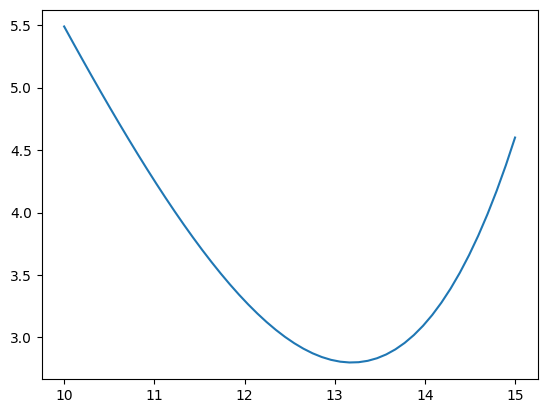

In [ ]:
x = np.linspace(x_l,x_u,50)
y = F(x)
plt.plot(x, y)
plt.show()

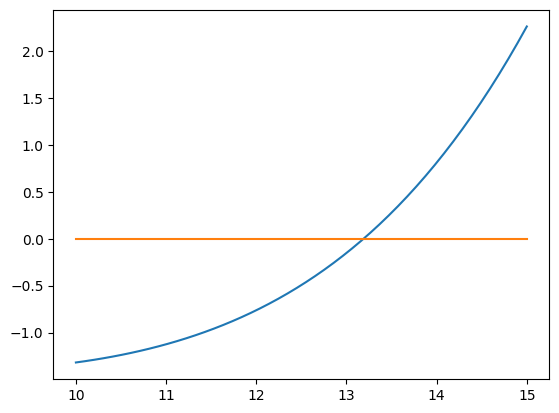

In [ ]:
y = Fp(x)
z = np.linspace(0,0,50)
plt.plot(x, y)
plt.plot(x, z)
plt.show()

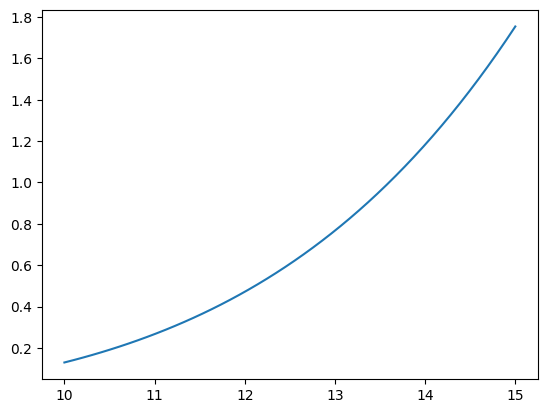

In [ ]:
y = Fpp(x)
plt.plot(x, y)
plt.show()

The interval Newton method for $F'(x)=0$

In [ ]:
X = interval[x_l,x_u]
for i in range(10):
  mid = (X[0].inf+X[0].sup)/2
  tmp = mid-Fp(mid)/Fpp(X)
  X = interval[max(X[0].inf, tmp[0].inf), min(X[0].sup, tmp[0].sup)]
  print(X)

interval([12.774465736115975, 15.0])
interval([12.86948469586417, 13.503121261630165])
interval([13.188728435656822, 13.189569279054375])
interval([13.189106005330046, 13.189106022224898])
interval([13.189106013368718, 13.18910601336872])
interval([13.189106013368718, 13.18910601336872])
interval([13.189106013368718, 13.18910601336872])
interval([13.189106013368718, 13.18910601336872])
interval([13.189106013368718, 13.18910601336872])
interval([13.189106013368718, 13.18910601336872])


In [ ]:
F(X)

interval([2.7986430673197367, 2.798643067319754])

## Part 2

Recall
$$a=b=\frac{1}{2},\quad p=7,\quad r=\frac{p}{2}+a+b=\frac{9}{2}$$

Let
$$\gamma=\frac{1}{10}\quad\text{and}\quad N=20.$$
Then
$$
(1+\gamma)=\frac{11}{10}\quad b-1+\gamma b =-\frac{1}{2}+\frac{1}{20}=-\frac{9}{20}
$$
and
$$
b-1+\gamma b + \gamma(i-1)=\frac{-9+2(i-1)}{20}
$$
for $i=2,\dots,20$.

$F(w)= 20 \times f_{20}(w;\gamma) $

Definition of $F$ and the derivative of $F$, `Fp`

In [ ]:
p = 7
r = p/2+a+b

In [ ]:
N = 20
bb = [b + i for i in range(N-1)]
rr = [r + i + 1 for i in range(N)]
my_keisu_1 = [22, -9/(r+1)]
my_keisu_2 = [(2*i-7)*math.prod(bb[0:(i+1)])/math.prod(rr[0:(i+2)]) for i in range(N-1)]
my_keisu = my_keisu_1 + my_keisu_2

In [ ]:
def f(x):
  myg = my_keisu[0]
  for i in range(1,N+1):
    myg = my_keisu[i]*x**i/math.factorial(i) + myg
  return myg

In [ ]:
def fp(x):
  mygp = my_keisu[1]
  for i in range(1,N):
    mygp = my_keisu[i+1]*x**i/math.factorial(i) + mygp
  return mygp

Graphs of `F` and `Fp`

In [ ]:
x_l = 9.5
x_u = 12.5

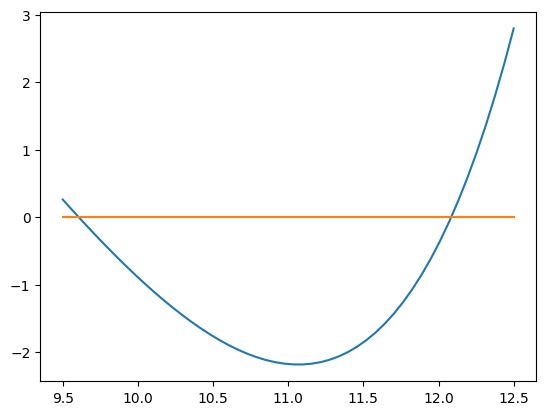

In [ ]:
x = np.linspace(x_l,x_u, 50)
y = f(x)
plt.plot(x, y)
z = np.linspace(0,0,50)
plt.plot(x, z)
plt.show()

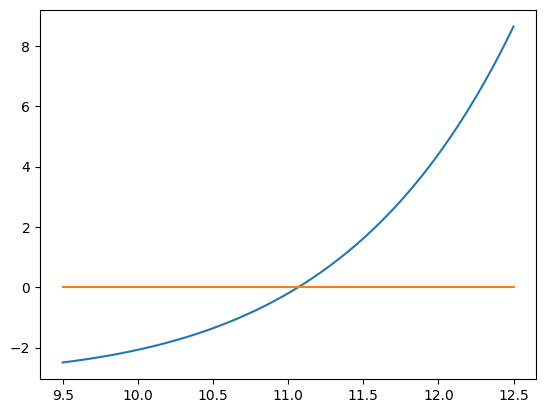

In [ ]:
y = fp(x)
z = np.linspace(0,0,50)
plt.plot(x, y)
plt.plot(x, z)
plt.show()

The smaller solution of $F(x)=0$

In [ ]:
X_smaller = interval[9,11]
for i in range(10):
  mid = (X_smaller[0].inf+X_smaller[0].sup)/2
  tmp = mid-f(mid)/fp(X_smaller)
  X_smaller = interval[max(X_smaller[0].inf,tmp[0].inf), min(X_smaller[0].sup,tmp[0].sup)]
  print(X_smaller)

interval([9.0, 9.749203161961281])
interval([9.568032963635426, 9.66059760344067])
interval([9.606860657111076, 9.60727478178188])
interval([9.607084006305325, 9.607084010439147])
interval([9.607084008410354, 9.607084008410355])
interval([9.607084008410354, 9.607084008410355])
interval([9.607084008410354, 9.607084008410355])
interval([9.607084008410354, 9.607084008410355])
interval([9.607084008410354, 9.607084008410355])
interval([9.607084008410354, 9.607084008410355])


The larger solution of $F(x)=0$

In [ ]:
X_larger = interval[12,13]
for i in range(10):
  mid = (X_larger[0].inf+X_larger[0].sup)/2
  tmp = mid-f(mid)/fp(X_larger)
  X_larger = interval[max(X_larger[0].inf,tmp[0].inf), min(X_larger[0].sup,tmp[0].sup)]
  print(X_larger)

interval([12.0, 12.320369313870257])
interval([12.064980138889286, 12.103326613510188])
interval([12.083940222597732, 12.083953523375362])
interval([12.083947009879418, 12.083947009882479])
interval([12.083947009880934, 12.083947009880935])
interval([12.083947009880934, 12.083947009880935])
interval([12.083947009880934, 12.083947009880935])
interval([12.083947009880934, 12.083947009880935])
interval([12.083947009880934, 12.083947009880935])
interval([12.083947009880934, 12.083947009880935])


Together with Lemma C.1, we see that $ 20 \times f_{20}(w;\gamma) >0$ if either
$0<w \leq $ `X_smaller[0].inf` or
$w \geq $ `X_larger[0].sup`

## Part 3

Set  
`w_lower`=`9.6`<`X_smaller[0].inf`  
and  
`w_upper`=`12.1`>`X_larger[0].sup`.

In [ ]:
w_lower = 9.6
w_upper = 12.1

`ratio_M` The approximation of
$$
\frac{-M(-1/2,p/2+1,w)}{M(1/2,p/2+1,w)}
$$
based on (B.1) and (B.3) from Supplementary Materials

In [ ]:
L = 20
br_1 = [(b-1+i)/(r+i) for i in range(L+1)]
br_2 = [(b+i)/(r+i) for i in range(L+1)]
br_3 = math.prod(br_2[0:(L+1)])

In [ ]:
def ratio_M(x):
  tmp_1 = 1
  tmp_2 = 1 + br_3*(math.exp(w_upper)-1)
  for i in range(1, L):
    tmp =  x**i/math.factorial(i)
    tmp_1 =  math.prod(br_1[0:i])*tmp + tmp_1
    tmp_2 =  (math.prod(br_2[0:i])-br_3)*tmp + tmp_2
  return -tmp_1/tmp_2

Graph of `ratio_M`

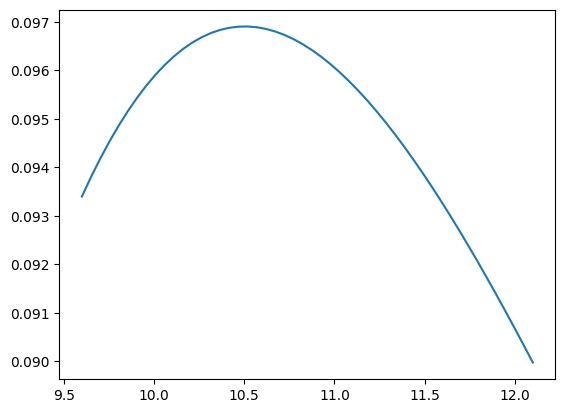

In [ ]:
x = np.linspace(w_lower, w_upper, 50)
y = ratio_M(x)
plt.plot(x, y)
plt.show()

In [ ]:
LL = 12
for i in range(LL):
  tmp_3 = w_lower + i*(w_upper - w_lower)/LL
  tmp_4 = interval[tmp_3,tmp_3+(w_upper - w_lower)/LL]
  print(ratio_M(tmp_4))

interval([0.08555593813708481, 0.10358031012819507])
interval([0.08661423202521457, 0.10510426953265398])
interval([0.08728165039723923, 0.10618588707556206])
interval([0.08758831967315843, 0.10685284670942967])
interval([0.08756698572723169, 0.10713672544285287])
interval([0.0872520324867329, 0.10707195706072856])
interval([0.08667854775559838, 0.10669479271622852])
interval([0.08588147398286054, 0.10604230842055655])
interval([0.08489487099843117, 0.10515149988690851])
interval([0.08375130680508469, 0.10405849394316173])
interval([0.08248138239813961, 0.10279789417632444])
interval([0.08111338801875884, 0.10140226773439275])
